In [78]:
%cd "C:\\Users\\jorge\\Documents\\Videogames_img\\TC3002B"
#!ls

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\jorge\Documents\Videogames_img\TC3002B


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset'
queries_dir = os.path.join(base_dir,'Queries')
batch_size = 13

In [80]:
queries_ds = ImageDataGenerator(
    rescale = 1./255,
    )


queries_generator = queries_ds.flow_from_directory(
    queries_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 13 images belonging to 10 classes.


In [81]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [94]:
savedModel = load_model('videogame_img_v3.h5')

queries_imgs = queries_generator[0][0]
queries_labels = queries_generator[0][1]

predictions = savedModel.predict(queries_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x
queries_labels_y = np.argmax(queries_labels,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


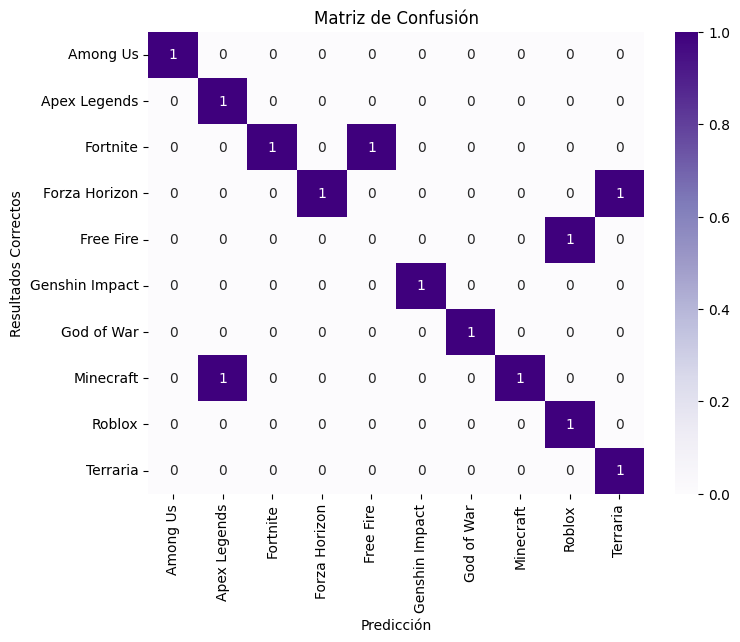

In [95]:
from tensorflow.math import confusion_matrix
import seaborn as sns

class_names = ['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria']

mat = confusion_matrix(classes_x, queries_labels_y)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Purples", xticklabels=['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria'], yticklabels=['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria'])
plt.xlabel('Predicción')
plt.ylabel('Resultados Correctos')
plt.title('Matriz de Confusión')
plt.show()

In [96]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

IndexError: index 13 is out of bounds for axis 0 with size 13

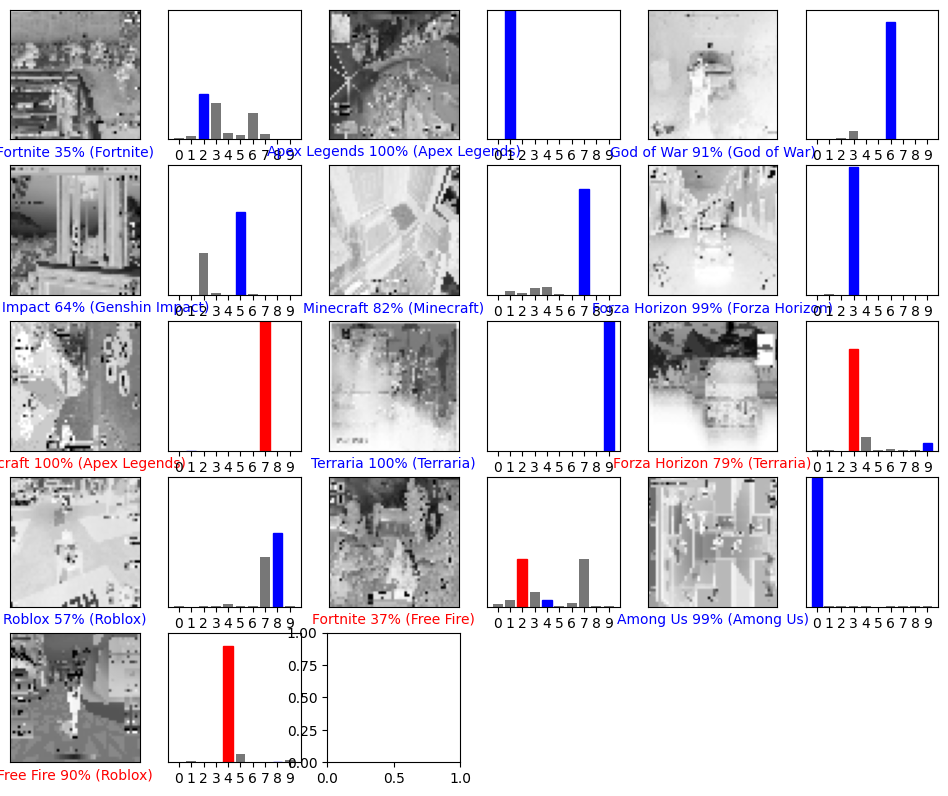

In [97]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], queries_labels_y, queries_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], queries_labels_y)
plt.tight_layout()
plt.show()